# Class 5. Intermediate Python & AI 

# Intro to ML with Python. Linear regression

### Table of contents

0. Normalization and functions
1. Build train test set
2. Linear regression model

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv('../../datasets/exams_mod_cleaned.csv')

In [104]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


In [105]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'Year', 'Age'],
      dtype='object')

In [106]:
df.shape

(951, 11)

# 0. Normalization, Functions and more

In [107]:
data = pd.get_dummies(
        df, columns=['gender', 'race/ethnicity', 
     'parental level of education', 'lunch', 'test preparation course'], 
drop_first=True, dtype=int)
data.head()

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
0,67,67,63,1000,2023,14.0,1,0,0,0,0,0,1,0,0,1,0
1,40,29,55,1001,2023,17.0,0,0,0,1,0,0,1,0,0,0,1
2,59,60,50,1002,2023,14.0,1,0,0,0,1,0,0,0,1,0,1
3,77,78,68,1003,2023,17.0,1,1,0,0,0,0,1,0,0,1,1
4,78,73,68,1004,2023,16.0,1,0,0,0,1,0,0,0,0,1,0


In [108]:
data.columns

Index(['math score', 'reading score', 'writing score', 'id_student', 'Year',
       'Age', 'gender_male', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

### Build the normalize function

In [109]:
data.head()

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
0,67,67,63,1000,2023,14.0,1,0,0,0,0,0,1,0,0,1,0
1,40,29,55,1001,2023,17.0,0,0,0,1,0,0,1,0,0,0,1
2,59,60,50,1002,2023,14.0,1,0,0,0,1,0,0,0,1,0,1
3,77,78,68,1003,2023,17.0,1,1,0,0,0,0,1,0,0,1,1
4,78,73,68,1004,2023,16.0,1,0,0,0,1,0,0,0,0,1,0


In [110]:
def normalize_columns(column):
    new_list = []
    min_val = column.min()
    max_val = column.max()
    for i in column: 
        result = (i - min_val) / (max_val - min_val)
        new_list.append(result)
    return new_list
    

In [111]:
data['normalized writing score'] = normalize_columns(data['writing score'])
data.head()

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score
0,67,67,63,1000,2023,14.0,1,0,0,0,0,0,1,0,0,1,0,0.519481
1,40,29,55,1001,2023,17.0,0,0,0,1,0,0,1,0,0,0,1,0.415584
2,59,60,50,1002,2023,14.0,1,0,0,0,1,0,0,0,1,0,1,0.350649
3,77,78,68,1003,2023,17.0,1,1,0,0,0,0,1,0,0,1,1,0.584416
4,78,73,68,1004,2023,16.0,1,0,0,0,1,0,0,0,0,1,0,0.584416


In [112]:
def normalize_column(df, column_name):
    
    # Get the minimum and maximum values of the column
    min_value = df[column_name].min()
    max_value = df[column_name].max()

    # Normalize the column values to be in the range 0 to 1
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    
    return df

In [113]:
cols_to_norm = ['reading score', 'writing score']
data_norm = normalize_column(data, cols_to_norm)
data_norm[cols_to_norm].head()

,reading score,writing score
0,0.611765,0.519481
1,0.164706,0.415584
2,0.529412,0.350649
3,0.741176,0.584416
4,0.682353,0.584416


In [114]:
def normalized_funct(X):
    Xmin= X.min()
    Xmax= X.max()
    return (X-Xmin)/(Xmax-Xmin)

In [115]:
normalized_funct(data['reading score']).head()

0    0.611765
1    0.164706
2    0.529412
3    0.741176
4    0.682353
Name: reading score, dtype: float64

In [116]:
normalized_funct(data[cols_to_norm]).head()

,reading score,writing score
0,0.611765,0.519481
1,0.164706,0.415584
2,0.529412,0.350649
3,0.741176,0.584416
4,0.682353,0.584416


In [117]:
data.head()

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score
0,67,0.611765,0.519481,1000,2023,14.0,1,0,0,0,0,0,1,0,0,1,0,0.519481
1,40,0.164706,0.415584,1001,2023,17.0,0,0,0,1,0,0,1,0,0,0,1,0.415584
2,59,0.529412,0.350649,1002,2023,14.0,1,0,0,0,1,0,0,0,1,0,1,0.350649
3,77,0.741176,0.584416,1003,2023,17.0,1,1,0,0,0,0,1,0,0,1,1,0.584416
4,78,0.682353,0.584416,1004,2023,16.0,1,0,0,0,1,0,0,0,0,1,0,0.584416


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
cols_to_norm

['reading score', 'writing score']

In [120]:
MinMaxScaler().fit_transform(df[['reading score', 'writing score']])

array([[0.61176471, 0.51948052],
       [0.16470588, 0.41558442],
       [0.52941176, 0.35064935],
       ...,
       [0.85882353, 1.        ],
       [0.48235294, 0.54545455],
       [0.31764706, 0.28571429]])

In [121]:
#import sikit
from sklearn.preprocessing import MinMaxScaler

In [122]:
data[['read_minmax', 'write_minmax']] = MinMaxScaler().fit_transform(df[cols_to_norm])

In [123]:
data[['reading score', 'writing score', 'read_minmax', 'write_minmax']].head()

,reading score,writing score,read_minmax,write_minmax
0,0.611765,0.519481,0.611765,0.519481
1,0.164706,0.415584,0.164706,0.415584
2,0.529412,0.350649,0.529412,0.350649
3,0.741176,0.584416,0.741176,0.584416
4,0.682353,0.584416,0.682353,0.584416


### Checking whether they are equal

In [124]:
data = data.round(5)

In [125]:
data['reading score'].equals(data['read_minmax'])

True

In [126]:
(data['reading score'].values == data['read_minmax'].values).all()

True

### Changing one value to show that it fails in this case

In [127]:
data.loc[0, 'read_minmax'] = 0.8

In [128]:
data.head(1)

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score,read_minmax,write_minmax
0,67,0.61176,0.51948,1000,2023,14.0,1,0,0,0,0,0,1,0,0,1,0,0.51948,0.8,0.51948


In [129]:
data['reading score'].equals(data['read_minmax'])

False

In [130]:
(data['reading score'] == data['read_minmax']).all()

False

In [131]:
data.drop(['read_minmax', 'write_minmax'], axis=1, inplace=True)

### Functions 

In [132]:
def a_function(my_in_1, my_in_2):
    print('This is my input 1: {}'.format(my_in_1))
    print('This is my input 2: {}'.format(my_in_2))    

In [133]:
a_function(1,2)

This is my input 1: 1
This is my input 2: 2


In [134]:
def a_function_2(my_in_1, my_in_2, my_in_3):
    if my_in_1 == 1:
        return 'it is a one'
    else:
        return my_in_2

In [135]:
print(a_function_2(2,5,3))

5


In [136]:
def deduplicate_data(df):
    """
    Deduplicate my data
    Params: 
        df: pandas data frame
    Ouputs: 
        deduplicated data
    """
    
    return df.drop_duplicates(inplace=True)


def remove_irrelevant_data(df):
    """
    Function to remove data we don't want
    Params: 
        df: input dataframe
    Output: 
        red_df: reduced dataframe 
    """
    
    red_df = df[df['age'] > 20]
    
    return red_df


def fix_structural_errors(df):
    """
    Fixing misspellings in City and Gender
    Params: 
        df: input dataframe
    Outputs:
        fixed_data: dataframe with errors corrected in columns
    """
    
    fix_data_1 = correct_city(df)
    fixed_data = correct_gender(fix_data_1)
    
    return fixed_data    


def save_outputs(df):
    """
    Save dataframe
    Params: 
        df: input dataframe
    """
    
    df.to_csv('name.tsv', sep='\t', index=None)


def clean_data(data):
    """
    Funtion to clean your data
    Params:
        data: pandas dataframe with all the info
    Outputs: 
        data_cleaned: pandas dataframe after EDA and cleanup
    """
    
    no_dups = deduplicate_data(data)
    
    irr_data = remove_irrelevant_data(no_dups)
    
    fixed_errors = fix_structural_errors(irr_data)
    
    save_outputs(fixed_errors)

## 1. Preparing data for model

In [137]:
data.shape

(951, 18)

In [138]:
for col in data.columns:
    print(col, data[col].nunique())

math score 77
reading score 85
writing score 57
id_student 941
Year 1
Age 5
gender_male 2
race/ethnicity_group B 2
race/ethnicity_group C 2
race/ethnicity_group D 2
race/ethnicity_group E 2
parental level of education_bachelor's degree 2
parental level of education_high school 2
parental level of education_master's degree 2
parental level of education_some college 2
lunch_standard 2
test preparation course_none 2
normalized writing score 57


In [139]:
data.drop(['Year', 'id_student'], axis=1, inplace=True)


In [140]:
data.shape

(951, 16)

In [141]:
df = df.drop_duplicates()
df.shape

(941, 11)

# 2. Build train test set 

In [142]:
def get_training_test(df):
    """
    
    """

    return train_test_split(df, test_size=0.1, random_state=0)

In [143]:
def build_train_test(df):
    """
    
    """

    train, test = get_training_test(df)

    trainY = train['math score'].values
    testY = test['math score'].values
    
    trainX = train.drop(['math score'], axis=1).values
    testX = test.drop(['math score'], axis=1).values

    return trainX, trainY, testX, testY, \
        train.drop(['math score'], axis=1).columns

In [144]:
trainX, trainY, testX, testY, feature_names = build_train_test(data)

## Easier Option

In [145]:
#load train test split from scikit learn
from sklearn.model_selection import train_test_split

In [146]:
data.head()

,math score,reading score,writing score,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score
0,67,0.61176,0.51948,14.0,1,0,0,0,0,0,1,0,0,1,0,0.51948
1,40,0.16471,0.41558,17.0,0,0,0,1,0,0,1,0,0,0,1,0.41558
2,59,0.52941,0.35065,14.0,1,0,0,0,1,0,0,0,1,0,1,0.35065
3,77,0.74118,0.58442,17.0,1,1,0,0,0,0,1,0,0,1,1,0.58442
4,78,0.68235,0.58442,16.0,1,0,0,0,1,0,0,0,0,1,0,0.58442


In [147]:
df1, df2 = train_test_split(data, test_size=0.1, random_state=0)
print(df1.shape, df2.shape)

(855, 16) (96, 16)


In [148]:
df1.head()

,math score,reading score,writing score,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score
489,79,0.71765,0.62338,15.00000,0,0,0,0,1,0,0,0,1,1,1,0.62338
262,77,0.76471,0.74026,16.00000,1,0,1,0,0,0,0,0,0,1,1,0.74026
8,63,0.48235,0.54545,15.00000,1,0,0,1,0,0,1,0,0,1,1,0.54545
776,65,0.56471,0.53247,15.49663,1,0,0,1,0,0,1,0,0,1,1,0.53247
523,40,0.36471,0.44156,17.00000,0,0,0,1,0,0,1,0,0,1,1,0.44156


In [149]:
data.head()

,math score,reading score,writing score,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none,normalized writing score
0,67,0.61176,0.51948,14.0,1,0,0,0,0,0,1,0,0,1,0,0.51948
1,40,0.16471,0.41558,17.0,0,0,0,1,0,0,1,0,0,0,1,0.41558
2,59,0.52941,0.35065,14.0,1,0,0,0,1,0,0,0,1,0,1,0.35065
3,77,0.74118,0.58442,17.0,1,1,0,0,0,0,1,0,0,1,1,0.58442
4,78,0.68235,0.58442,16.0,1,0,0,0,1,0,0,0,0,1,0,0.58442


In [150]:
Y = data['math score']
X = data.drop(columns=['math score'], axis=1)

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [152]:
Y = data['math score']

In [153]:
X = data.drop('math score', axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((855, 15), (96, 15), (855,), (96,))

## Also Possible 

In [156]:
train, test = train_test_split(data, test_size=0.1, random_state=0)

In [157]:
train.shape

(855, 16)

In [158]:
test.shape

(96, 16)

In [159]:
data.columns

Index(['math score', 'reading score', 'writing score', 'Age', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college', 'lunch_standard',
       'test preparation course_none', 'normalized writing score'],
      dtype='object')

#### I will always have a train and a test set. 
#### Also, I have the features that correspond to all the data and the labels which is the column I want to predict. In this case, the math score column

In [160]:
#Separate the labels
trainY = train['math score'].values
testY = test['math score'].values

#Get all features but the labels
trainX = train.drop(['math score'], axis=1).values
testX = test.drop(['math score'], axis=1).values

## 3. Linear regression model

In [161]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [162]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX, trainY)

# Make predictions using the testing set
y_pred = regr.predict(testX)

# The mean absolute error
print("MAE: %.2f" % mean_absolute_error(testY, y_pred))
print("MAPE: {} %".format(round(mean_absolute_percentage_error(testY, y_pred) * 100, 2)))

MAE: 5.30
MAPE: 8.67 %


In [163]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX, trainY)

# Make predictions using the testing set
y_pred = regr.predict(testX)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testY, y_pred))
# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(testY, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(testY, y_pred))

Coefficients: 
 [13.76569065 22.55151689 -0.19966553 12.41325537 -0.60540543 -0.67618632
 -1.19467096  4.19207253 -1.02442725  1.05109989 -1.70207268 -1.77868682
  4.60584349  4.59557327 22.55151689]
Mean squared error: 47.89
Mean absolute error: 5.30
Coefficient of determination: 0.79


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [169]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(kernel='linear')  # Change kernel as needed
}

Model: Linear Regression
Mean absolute error: 5.3010085556398705
Model: Linear Regression
Mean Squared Error: 47.88575300565128
R-squared: 0.7867461957267187


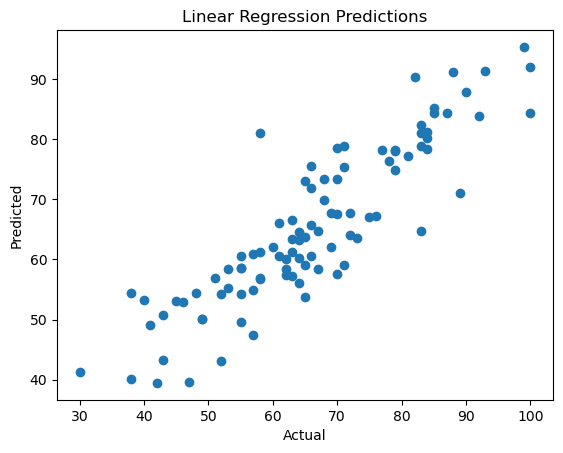

Model: Decision Tree Regressor
Mean absolute error: 6.46875
Model: Decision Tree Regressor
Mean Squared Error: 65.11458333333333
R-squared: 0.7100195415562501


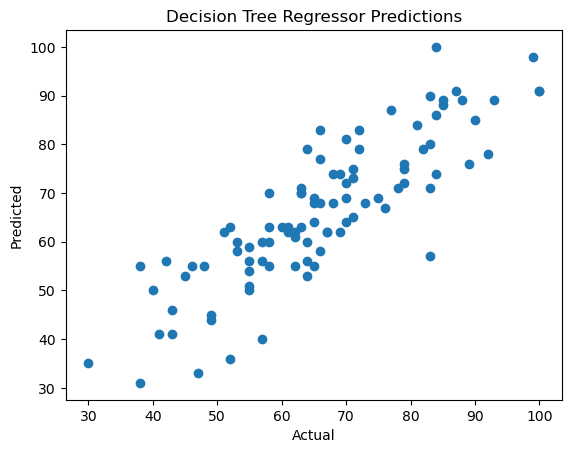

Model: Random Forest Regressor
Mean absolute error: 4.890052083333333
Model: Random Forest Regressor
Mean Squared Error: 39.66792734374999
R-squared: 0.8233433561608091


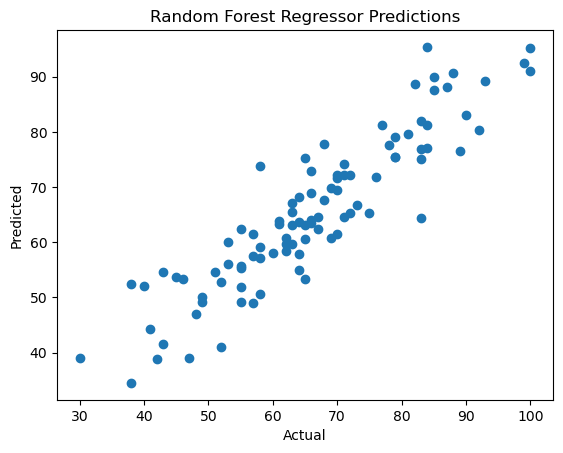

Model: Support Vector Regressor
Mean absolute error: 5.412008193239782
Model: Support Vector Regressor
Mean Squared Error: 48.370373595200135
R-squared: 0.7845879925480351


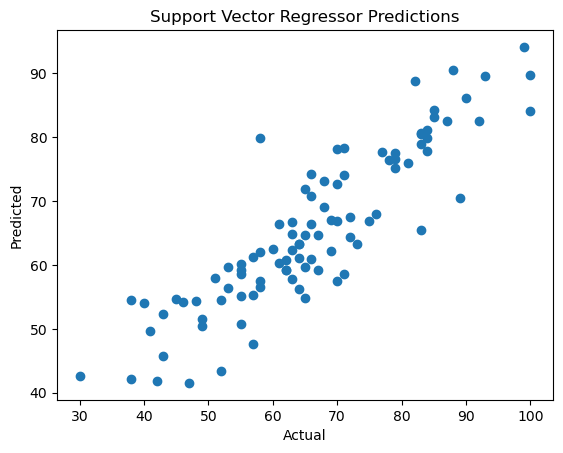

In [172]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(testY, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display model performance
    print(f"Model: {model_name}")
    print(f"Mean absolute error: {mae}")
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Optionally, you can visualize the predictions
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} Predictions')
    plt.show()

# Do normalization afterwards

In [174]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,Year,Age
0,male,group A,high school,standard,completed,67,67,63,1000,2023,14.0
1,female,group D,high school,free/reduced,none,40,29,55,1001,2023,17.0
2,male,group E,some college,free/reduced,none,59,60,50,1002,2023,14.0
3,male,group B,high school,standard,none,77,78,68,1003,2023,17.0
4,male,group E,associate's degree,standard,completed,78,73,68,1004,2023,16.0


In [175]:
data = pd.get_dummies(
        df, columns=['gender', 'race/ethnicity', 
     'parental level of education', 'lunch', 'test preparation course'], 
drop_first=True)
data.head()

,math score,reading score,writing score,id_student,Year,Age,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
0,67,67,63,1000,2023,14.0,True,False,False,False,False,False,True,False,False,True,False
1,40,29,55,1001,2023,17.0,False,False,False,True,False,False,True,False,False,False,True
2,59,60,50,1002,2023,14.0,True,False,False,False,True,False,False,False,True,False,True
3,77,78,68,1003,2023,17.0,True,True,False,False,False,False,True,False,False,True,True
4,78,73,68,1004,2023,16.0,True,False,False,False,True,False,False,False,False,True,False


In [55]:
data.drop(['Year', 'Age', 'id_student'], axis=1, inplace=True)

In [56]:
data.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
0,67,67,63,True,False,False,False,False,False,True,False,False,True,False
1,40,29,55,False,False,False,True,False,False,True,False,False,False,True
2,59,60,50,True,False,False,False,True,False,False,False,True,False,True
3,77,78,68,True,True,False,False,False,False,True,False,False,True,True
4,78,73,68,True,False,False,False,True,False,False,False,False,True,False


### 1st Do the train test split first

In [57]:
train, test = train_test_split(data, test_size=0.1, random_state=0)

In [58]:
train.shape, test.shape

((846, 14), (95, 14))

### 2nd Normalize the sets separately

In [59]:
cols_to_norm = ['reading score', 'writing score']
train_norm = normalize_column(train, cols_to_norm)
test_norm = normalize_column(test, cols_to_norm)
train_norm[cols_to_norm].head()

,reading score,writing score
698,0.882353,1.000000
345,0.658824,0.688312
346,0.447059,0.428571
905,0.505882,0.415584
34,0.588235,0.402597


In [60]:
test_norm[cols_to_norm].head()

,reading score,writing score
571,0.731707,1.000000
304,0.512195,0.388060
308,0.439024,0.149254
590,0.560976,0.313433
614,0.195122,0.611940


In [61]:
data_norm = normalize_column(data, cols_to_norm)
data_norm[cols_to_norm].iloc[14]

reading score    0.376471
writing score    0.246753
Name: 14, dtype: float64

In [62]:
test_norm.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
571,83,0.731707,1.000000,True,False,True,False,False,False,True,False,False,False,False
304,58,0.512195,0.388060,True,False,False,True,False,False,False,False,True,False,False
308,56,0.439024,0.149254,True,False,True,False,False,False,False,False,True,True,True
590,58,0.560976,0.313433,True,True,False,False,False,True,False,False,False,False,True
614,60,0.195122,0.611940,False,False,False,True,False,False,True,False,False,True,True


In [63]:
train_norm.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_standard,test preparation course_none
698,85,0.882353,1.000000,False,False,False,True,False,False,False,False,True,True,True
345,66,0.658824,0.688312,False,True,False,False,False,False,False,False,True,True,False
346,59,0.447059,0.428571,True,False,False,False,True,False,False,False,True,False,False
905,49,0.505882,0.415584,True,False,True,False,False,False,False,False,False,True,False
34,67,0.588235,0.402597,True,True,False,False,False,False,True,False,False,False,True


In [64]:
#Separate the labels
trainY = train_norm['math score'].values
testY = test_norm['math score'].values

#Get all features but the labels
trainX = train_norm.drop(['math score'], axis=1).values
testX = test_norm.drop(['math score'], axis=1).values

In [176]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(trainX, trainY)

# Make predictions using the testing set
y_pred = regr.predict(testX)

# The mean absolute error
print("MAE: %.2f" % mean_absolute_error(testY, y_pred))
print("MAPE: {} %".format(round(mean_absolute_percentage_error(testY, y_pred) * 100, 2)))

MAE: 5.30
MAPE: 8.67 %


In [178]:
testX[0,:]

array([ 0.67059,  0.5974 , 16.     ,  1.     ,  0.     ,  1.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        1.     ,  1.     ,  0.5974 ])

In [180]:
regr.predict(testX[0,:].reshape(1,-1))

array([75.31638901])